# 단어 임베딩을 사용하여 텍스트 유사성 계산하기

In [2]:
import gensim
import numpy as np
from sklearn.manifold import TSNE
from sklearn import svm
import matplotlib.pyplot as plt
import random

## 미리 학습된 단어 임베딩을 이용하여 단어 유사성 찾기

### Load Word2Vec

> 교재의 URL에서 다운받는 소스는 에러가 잦아 직접 다운로드 하는 것을 권장
> - 압축을 푼 3.6GB의 'word2vec.bin' 파일을 소스 디렉토리에 배치한 후 아래 소스를 실행

In [3]:
model = gensim.models.KeyedVectors.load('./word2vec.bin') #unicode 문제로 load_word2vec_format 사용하지 않음

### 유사한 단어 찾기

In [4]:
model.most_similar(positive = ['espresso'])

C:\Users\ICPS\AppData\Local\Continuum\anaconda3\envs\RNN\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cappuccino', 0.6888186931610107),
 ('mocha', 0.6686208844184875),
 ('coffee', 0.6616826057434082),
 ('latte', 0.6536753177642822),
 ('caramel_macchiato', 0.6491268873214722),
 ('ristretto', 0.6485545635223389),
 ('espressos', 0.6438628435134888),
 ('macchiato', 0.6428250074386597),
 ('chai_latte', 0.6308028697967529),
 ('espresso_cappuccino', 0.6280542612075806)]

## Word2vec 수학

### "When A->B, C->?" 함수 작성

In [5]:
def A_is_to_B_as_C_is_to(a, b, c, topn = 1): # topn : 상위 N개 단어 검색 (Top N)
    a, b, c = map(lambda x:x if type(x) == list else [x], (a, b, c))
    res = model.most_similar(positive=b + c, negative=a, topn=topn)
    
    if len(res):
        if topn == 1:
            return res[0][0]
        return [x[0] for x in res]
    return None

### 함수 활용

In [6]:
A_is_to_B_as_C_is_to('man', 'woman', 'king')

C:\Users\ICPS\AppData\Local\Continuum\anaconda3\envs\RNN\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'queen'

In [7]:
for country in 'Italy', 'France', 'India', 'China':
    print('%s is the capital of %s' % (A_is_to_B_as_C_is_to("Germany", "Berlin", country), country))

C:\Users\ICPS\AppData\Local\Continuum\anaconda3\envs\RNN\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China


In [8]:
for company in 'Google', 'IBM', 'Boeing', 'Microsoft', 'Samsung':
    products = A_is_to_B_as_C_is_to(
        ['Starbucks', 'Apple'],
        ['Starbucks_coffee', 'iPhone'],
        company,
        topn=3
    )
    print("%s -> %s" % (company, ', '.join(products)))

C:\Users\ICPS\AppData\Local\Continuum\anaconda3\envs\RNN\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Google -> personalized_homepage, app, Gmail
IBM -> DB2, WebSphere_Portal, Tamino_XML_Server
Boeing -> Dreamliner, airframe, aircraft
Microsoft -> Windows_Mobile, SyncMate, Windows
Samsung -> MM_A###, handset, Samsung_SCH_B###


## 단어 임베딩 시각화

### 임베딩 차원 축소 (t-SNE)

> t-SNE 알고리즘을 사용하여 고차원 공간을 2차원으로 축소한다. (t-distributed Stochastic Neighbor Embedding)

In [9]:
beverages = ['espresso', 'beer', 'vodka', 'wine', 'cola', 'tea']
countries = ['Italy', 'France', 'India', 'China', 'Germany', 'Russia', 'USA']
sports = ['soccer', 'handball', 'hockey', 'cycling', 'basketball', 'cricket']
classroom = ['table', 'chair', 'board', 'pen', 'pencil', 'eraser', 'television', 'computer']

items = beverages + countries + sports + classroom

items

['espresso',
 'beer',
 'vodka',
 'wine',
 'cola',
 'tea',
 'Italy',
 'France',
 'India',
 'China',
 'Germany',
 'Russia',
 'USA',
 'soccer',
 'handball',
 'hockey',
 'cycling',
 'basketball',
 'cricket',
 'table',
 'chair',
 'board',
 'pen',
 'pencil',
 'eraser',
 'television',
 'computer']

In [10]:
item_vectors = [(item, model[item])
                for item in items
                if item in model]

item_vectors[:3]

[('espresso',
  array([-0.19628906, -0.38476562, -0.15820312,  0.578125  ,  0.0022583 ,
          0.13476562,  0.265625  , -0.27539062,  0.16699219,  0.62890625,
         -0.02099609, -0.06738281,  0.3125    , -0.22070312,  0.25976562,
          0.171875  , -0.27539062,  0.13378906,  0.2734375 , -0.18554688,
         -0.25390625,  0.15820312,  0.05249023, -0.49804688, -0.1484375 ,
          0.13378906, -0.25390625,  0.35351562, -0.14550781, -0.07519531,
          0.09765625, -0.05200195,  0.08691406,  0.09277344, -0.24511719,
         -0.28710938,  0.09033203, -0.19726562,  0.03442383,  0.19433594,
          0.12890625, -0.09814453,  0.02355957,  0.07861328, -0.08154297,
         -0.06347656, -0.31640625, -0.20605469,  0.27929688,  0.21679688,
         -0.11425781,  0.42382812, -0.26367188, -0.20898438, -0.05419922,
          0.10644531,  0.23925781,  0.265625  , -0.4609375 , -0.33789062,
         -0.20898438, -0.13378906, -0.16699219, -0.01538086,  0.20019531,
         -0.18457031, -0

In [11]:
vectors = np.asarray([x[1] for x in item_vectors])
lengths = np.linalg.norm(vectors, axis = 1)
norm_vectors = (vectors.T / lengths).T
tsne = TSNE(n_components=2, perplexity=10, verbose=2).fit_transform(norm_vectors)

[t-SNE] Computing 26 nearest neighbors...
[t-SNE] Indexed 27 samples in 0.001s...
[t-SNE] Computed neighbors for 27 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 27 / 27
[t-SNE] Mean sigma: 0.483122
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 61.1669044, gradient norm = 0.4136071 (50 iterations in 0.013s)
[t-SNE] Iteration 100: error = 59.1917267, gradient norm = 0.3634045 (50 iterations in 0.013s)
[t-SNE] Iteration 150: error = 66.7926865, gradient norm = 0.2017357 (50 iterations in 0.012s)
[t-SNE] Iteration 200: error = 65.4479752, gradient norm = 0.0790966 (50 iterations in 0.013s)
[t-SNE] Iteration 250: error = 73.4920120, gradient norm = 0.2213003 (50 iterations in 0.013s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.492012
[t-SNE] Iteration 300: error = 1.3400612, gradient norm = 0.0012040 (50 iterations in 0.013s)
[t-SNE] Iteration 350: error = 0.8956350, gradient norm = 0.0009940 (50 i

### 시각화

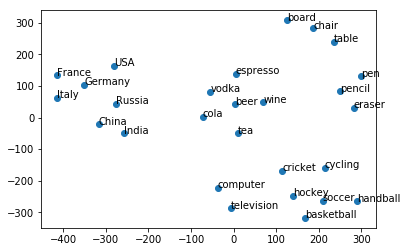

In [12]:
x = tsne[:,0]
y = tsne[:,1]
fig, ax = plt.subplots()
ax.scatter(x, y)

for item, x1, y1 in zip(item_vectors, x, y):
    ax.annotate(item[0], (x1, y1), size = 10)
    
plt.show()

## 임베딩에서 개체의 클래스 찾기

### SVM을 사용한 분류기 작성

In [13]:
positive = ['Chile', 'Mauritius', 'Barbados', 'Ukraine', 'Israel', 'Rwanda',
            'Venezuela', 'Lithuania', 'Costa_Rica', 'Romania', 'Japan', 'Senegal',
            'Canada', 'Malaysia', 'South_Korea', 'Australia', 'Tunisia', 'Armenia',
            'China', 'Czech_Republic', 'Guinea', 'Gambia', 'Gabon', 'Italy',
            'Montenegro', 'Guyana', 'Nicaragua', 'French_Guiana', 'Serbia',
            'Uruguay', 'Ethiopia', 'USA', 'Samoa', 'Antarctica', 'Suriname',
            'Finland', 'Bermuda', 'Cuba', 'Oman', 'Azerbaijan', 'Papua', 'France',
            'Tanzania', 'Germany']

negative = random.sample(model.vocab.keys(), 5000)
negative[:4]

['Minister_Mark_Prisk', 'Speedus_Announces', 'Mendiola', 'Nakheel_bondholders']

In [14]:
labelled = [(p, 1) for p in positive] + [(n, 0) for n in negative]
random.shuffle(labelled)
X = np.asarray([model[w] for w, l in labelled])
y = np.asarray([l for w, l in labelled])

In [15]:
TRAINING_FRACTION = 0.7
cut_off = int(TRAINING_FRACTION * len(labelled))
# sklearn.model_selection.train_test_split() 과 동일

clf = svm.SVC(kernel='linear')
clf.fit(X[:cut_off], y[:cut_off])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
res = clf.predict(X[cut_off:])
all_predictions = clf.predict(model.vectors) # sin0 is deprecated
missed = [country for (pred, truth, country) in
         zip(res, y[cut_off:], labelled[cut_off:]) if pred != truth]

100 - 100 * float(len(missed)) / len(res), missed

(100.0, [])

In [17]:
res = []
for word, pred in zip(model.index2word, all_predictions):
    if pred:
        res.append(word)
        if len(res) == 150:
            break
            
random.sample(res, 10)

['Singapore',
 'Bahrain',
 'Myanmar',
 'Norway',
 'Netherlands',
 'Indonesia',
 'Denmark',
 'abroad',
 'Romania',
 'Malta']

## 항목 내에서 시맨틱 거리 계산

In [18]:
countries = positive # SVM 분류기 셀을 실행해야 합니다

country_to_idx = {country: idx for idx, country in enumerate(countries)}
country_vecs = np.asarray([model[c] for c in countries])
country_vecs.shape

(44, 300)

### 국가 간의 유사도 측정

In [19]:
dists = np.dot(country_vecs,
              country_vecs[country_to_idx['South_Korea']])
for idx in reversed(np.argsort(dists)[-10:]):
    print(countries[idx], dists[idx])

South_Korea 10.420866
Japan 6.323795
China 5.28181
Uruguay 5.0177574
Malaysia 4.641665
Ukraine 4.4588976
Venezuela 4.363982
Finland 4.3175664
Czech_Republic 4.270298
Lithuania 4.1437097


### 국가와 용어 간의 유사도 측정

In [20]:
def rank_countries(term, topn=10):
    if not term in model:
        return []
    vec = model[term]
    dists = np.dot(country_vecs, vec)
    
    return [(countries[idx], float(dists[idx]))
           for idx in reversed(np.argsort(dists)[-topn:])]

In [21]:
rank_countries('kimchi')

[('South_Korea', 5.924840927124023),
 ('Japan', 3.862398862838745),
 ('China', 3.1807217597961426),
 ('Ukraine', 2.4729909896850586),
 ('Malaysia', 1.8567229509353638),
 ('Uruguay', 1.8567070960998535),
 ('Tunisia', 1.7421879768371582),
 ('Azerbaijan', 1.7076091766357422),
 ('Ethiopia', 1.5749425888061523),
 ('Italy', 1.5744032859802246)]

## 국가 데이터를 지도로 시각화하기

### GeoPandas를 사용해 지도 위에 시각화하기

> GeoPandas 설치 오류로 추후 작성 예정